In [2]:
#import the libraries
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()


In [3]:
# 1.1 For plotting faces
import matplotlib.pyplot as plt   
from skimage.io import imshow

# 1.2 Our dataset is here
from sklearn.datasets import fetch_olivetti_faces



In [4]:
faces.DESCR

'Modified Olivetti faces dataset.\n\nThe original database was available from\n\n    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nThe version retrieved here comes in MATLAB format from the personal\nweb page of Sam Roweis:\n\n    http://www.cs.nyu.edu/~roweis/\n\nThere are ten different images of each of 40 distinct subjects. For some\nsubjects, the images were taken at different times, varying the lighting,\nfacial expressions (open / closed eyes, smiling / not smiling) and facial\ndetails (glasses / no glasses). All the images were taken against a dark\nhomogeneous background with the subjects in an upright, frontal position (with\ntolerance for some side movement).\n\nThe original dataset consisted of 92 x 112, while the Roweis version\nconsists of 64x64 images.\n'

In [5]:
print (faces.keys())


dict_keys(['data', 'images', 'target', 'DESCR'])


In [6]:
print (faces.images.shape)

(400, 64, 64)


In [7]:
print (faces.data.shape)

(400, 4096)


In [8]:
print (faces.target.shape)

(400,)


In [9]:
print (np.max(faces.data))
print (np.min(faces.data))
print (np.mean(faces.data))

1.0
0.0
0.547043


In [10]:
#flatten the images

data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])     # 64 X 64 = 4096
# 5.1 Flattened 64 X 64 array

data.shape

(400, 4096)

In [11]:
#to display 40 images
def show_40_distinct_people(images, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

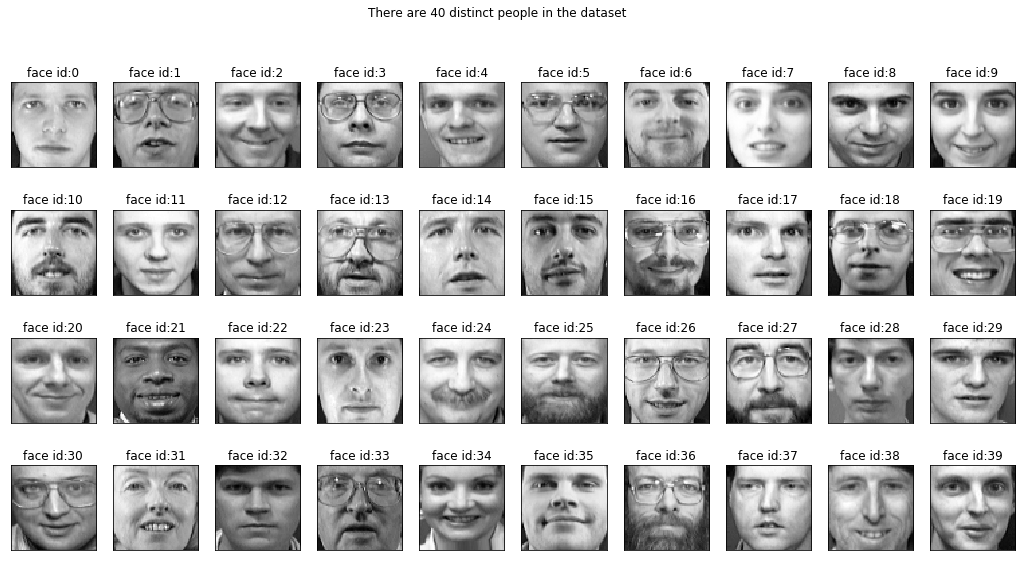

In [12]:
show_40_distinct_people(faces.images,np.unique(faces.target))

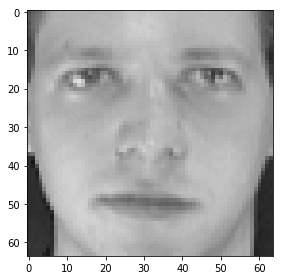

In [13]:
#Display the first image in the data
firstImage = faces.images[0]
imshow(firstImage) 

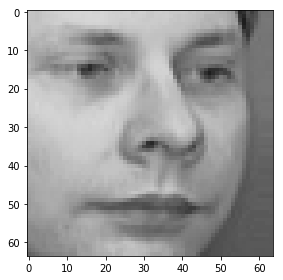

In [14]:
#Display the last image in the data
lastImage = faces.images[39]
imshow(lastImage) 

In [15]:
#plot the first 20 images
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))

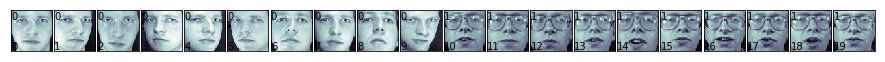

In [16]:


print_faces(faces.images, faces.target, 20)



In [17]:
#svm model for image recognition
from sklearn.svm import SVC


In [18]:
svc_1 = SVC(kernel='rbf')
print (svc_1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [19]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
#Split our dataset into training and testing datasets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        faces.data, faces.target, test_size=0.35, random_state=0)

C:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
#A function to evaluate K-fold cross-validation.
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem



In [22]:
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))

In [23]:
evaluate_cross_validation(svc_1, X_train, y_train, 4)

[ 0.04615385  0.06153846  0.07692308  0.01538462]
Mean score: 0.050 (+/-0.013)


In [24]:
#Function to perform training on the training set and evaluate the performance on the testing set
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [25]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
0.0384615384615
Accuracy on testing set:
0.0
Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.00      0.00      0.00         5
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         2
          5       0.00      0.00      0.00         5
          6       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         2
          9       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         5
         11       0.00      0.00      0.00         1
         12       0.00      0.00      0.00         2
         13       0.00      0.00      0.00         3
         14       0.00      0.00      0.00         6
         15       0.00      0.00      0.00         6
    

C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [26]:
# the index ranges of images of people with glasses
glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]

In [27]:
def create_target(segments):
    # create a new y array of target size initialized with zeros
    y = np.zeros(faces.target.shape[0])
    # put 1 in the specified segments
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

In [28]:
target_glasses = create_target(glasses)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
        faces.data, target_glasses, test_size=0.35, random_state=0)

In [30]:
#a  new SVC classifier 

svc_2 = SVC(kernel='poly')

In [31]:
#check the performance with cross-validation

evaluate_cross_validation(svc_2, X_train, y_train, 5)

[ 0.67307692  0.61538462  0.71153846  0.73076923  0.71153846]
Mean score: 0.688 (+/-0.021)


In [32]:
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

Accuracy on training set:
0.688461538462
Accuracy on testing set:
0.728571428571
Classification Report:
             precision    recall  f1-score   support

        0.0       0.73      1.00      0.84       102
        1.0       0.00      0.00      0.00        38

avg / total       0.53      0.73      0.61       140

Confusion Matrix:
[[102   0]
 [ 38   0]]


C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
X_test = faces.data[20:37]
y_test = target_glasses[20:37]

print (y_test.shape[0])

select = np.ones(target_glasses.shape[0])
select[20:37] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

print (y_train.shape[0])

17
383


In [34]:
svc_3 = SVC(kernel='poly')

In [35]:
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)

Accuracy on training set:
0.697127937337
Accuracy on testing set:
0.823529411765
Classification Report:
             precision    recall  f1-score   support

        0.0       0.82      1.00      0.90        14
        1.0       0.00      0.00      0.00         3

avg / total       0.68      0.82      0.74        17

Confusion Matrix:
[[14  0]
 [ 3  0]]


C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


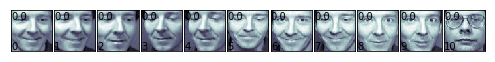

In [36]:
y_pred = svc_3.predict(X_test)
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 11)

In [37]:
#let us try for "linear" kernal

In [38]:
#svm model for image recognition
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
print (svc_1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [39]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
#Split our dataset into training and testing datasets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        faces.data, faces.target, test_size=0.25, random_state=0)

In [41]:
#A function to evaluate K-fold cross-validation.
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))

In [42]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]
Mean score: 0.913 (+/-0.012)


In [43]:
#Function to perform training on the training set and evaluate the performance on the testing set
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [44]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19    

In [45]:
#Pretty good. The classifier performs the operation with almost no error

In [46]:
# the index ranges of images of people with glasses
glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]

In [47]:
def create_target(segments):
    # create a new y array of target size initialized with zeros
    y = np.zeros(faces.target.shape[0])
    # put 1 in the specified segments
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

In [48]:
target_glasses = create_target(glasses)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
        faces.data, target_glasses, test_size=0.25, random_state=0)

In [50]:
#a  new SVC classifier 

svc_2 = SVC(kernel='linear')

In [51]:
#check the performance with cross-validation

evaluate_cross_validation(svc_2, X_train, y_train, 5)

[ 1.          0.95        0.98333333  0.98333333  0.93333333]
Mean score: 0.970 (+/-0.012)


In [52]:
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        67
        1.0       0.97      1.00      0.99        33

avg / total       0.99      0.99      0.99       100

Confusion Matrix:
[[66  1]
 [ 0 33]]


In [53]:
X_test = faces.data[20:40]
y_test = target_glasses[20:40]

print (y_test.shape[0])

select = np.ones(target_glasses.shape[0])
select[20:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

print (y_train.shape[0])

20
380


In [54]:
svc_3 = SVC(kernel='linear')

In [55]:
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.95
Classification Report:
             precision    recall  f1-score   support

        0.0       0.94      1.00      0.97        15
        1.0       1.00      0.80      0.89         5

avg / total       0.95      0.95      0.95        20

Confusion Matrix:
[[15  0]
 [ 1  4]]


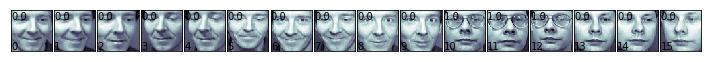

In [56]:
y_pred = svc_3.predict(X_test)
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 16)